In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import TheilSenRegressor
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [4]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
n_samples = 240

x1 = np.random.uniform(0, 10, n_samples)
x2 = np.random.uniform(0, 10, n_samples)
x3 = np.random.uniform(0, 10, n_samples)
y = 3 * x1 - 2 * x2 + np.random.normal(0, 1, n_samples)

# Combine into a DataFrame
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
})

# Save the DataFrame to a CSV file
csv_file_path = "synthetic_data.csv"
data.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")

Data saved to synthetic_data.csv


Coefficients: [ 3.02320355 -2.03202602  0.01945433]
Intercept: -0.02141960709361328


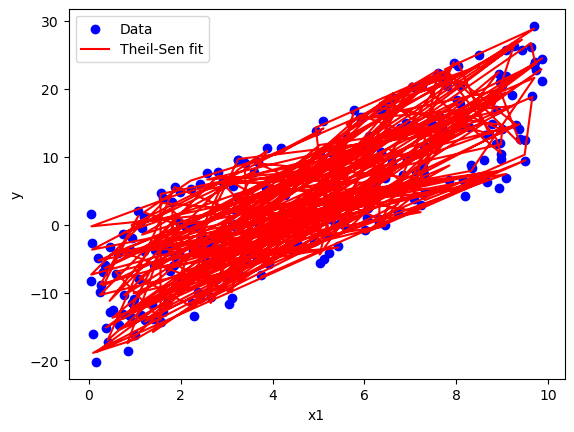

In [5]:
data = pd.read_csv("synthetic_data.csv")
X = data[['x1', 'x2', 'x3']]
y = data['y']
model = TheilSenRegressor()
model.fit(X, y)

# Extract coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Visualize the result for x1
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x1, model.predict(X), color='red', label='Theil-Sen fit')
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()


In [8]:
# Fit the Theil-Sen model
model = TheilSenRegressor()
model.fit(X, y)
observed_coefs = model.coef_

# Permutation testing to calculate p-values
n_permutations = 1000
null_distributions = np.zeros((n_permutations, X.shape[1]))

for i in range(n_permutations):
    shuffled_y = shuffle(y)  # Shuffle the response variable
    model.fit(X, shuffled_y)
    null_distributions[i, :] = model.coef_

# Calculate p-values
p_values = [
    np.mean(np.abs(null_distributions[:, j]) >= np.abs(observed_coefs[j]))
    for j in range(X.shape[1])
]

# Display results
print("Observed Coefficients:", observed_coefs)
print("P-values:", p_values)

Observed Coefficients: [ 3.01927916 -2.02663675  0.02650237]
P-values: [0.0, 0.0, 0.94]
